In [35]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [43]:
predicted = lr.predict(X_test)
lr.score(X_test, y_test)

0.8177083333333334

In [44]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, -1])

0.8783283582089552

0.8783283582089552

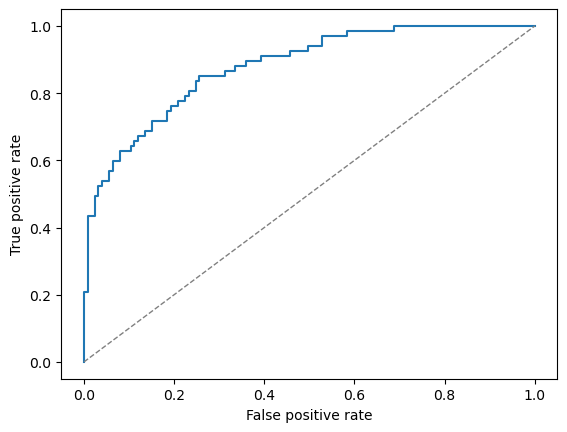

In [51]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, probabilities[:, -1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], color='grey', lw=1, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

metrics.auc(fpr, tpr)

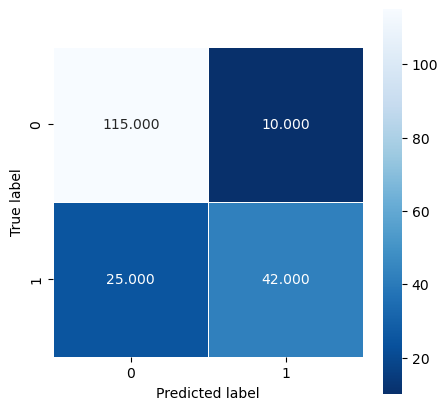

In [54]:
cm = metrics.confusion_matrix(y_test, predicted)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('True label');
plt.xlabel('Predicted label');

In [55]:
from sklearn.metrics import precision_score
train_predictions = lr.predict(X_train)
precision_score(y_train, train_predictions)

0.7290322580645161

In [56]:
from sklearn.metrics import recall_score
recall_score(y_train, train_predictions)

0.5621890547263682

In [57]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_train, train_predictions)

0.7250945273631841

In [58]:
test_predictions = lr.predict(X_test)
balanced_accuracy_score(y_test, test_predictions)

0.7734328358208955